In [82]:
import pandas as pd
import numpy as np
import os

In [83]:
files_tsf = os.listdir("../../data/tsfresh_features/")

In [84]:
len(files_tsf)

538

In [205]:
files_ok = [k for k in files_tsf if "OK_" in k]

files_F1 = [k for k in files_tsf if "FAULT 1" in k]
files_F2 = [k for k in files_tsf if "FAULT 2" in k]
files_F3 = [k for k in files_tsf if "FAULT 3" in k]

In [86]:
len(files_ok)

336

In [87]:
list_dfs = []

In [88]:
def read_tsfresh_df(name):
    df_fs = pd.read_csv("../../data/tsfresh_features/"+name,index_col="id").values
    
    return df_fs

In [55]:
list_dfs_ok = []
for f in files_ok:
    list_dfs_ok += [read_tsfresh_df(f)]
    

# save mean and SD for every group...

In [206]:
for (group, text) in [(files_ok,"OK"),(files_F1,"F1"),(files_F2,"F2"),(files_F3,"F3")]:
    list_dfs_ok = []
    print(text)
    for f in group:
        list_dfs_ok += [read_tsfresh_df(f)]
    arr_ok = np.array(list_dfs_ok)
    mean = arr_ok.mean(axis=0)
    std = arr_ok.std(axis=0)
    np.save("../../data/tsfresh_3d/3d_"+text+".npy", arr_ok)
    np.save("../../data/tsfresh_3d/mean_"+text+".npy", mean)
    np.save("../../data/tsfresh_3d/std_"+text+".npy", std)

OK
F1
F2
F3


# Cohens d

In [225]:
mean_ok = np.load("../../data/tsfresh_3d/mean_"+"OK"+".npy")
std_ok = np.load("../../data/tsfresh_3d/std_"+"OK"+".npy")
n_ok = np.load("../../data/tsfresh_3d/3d_"+"OK"+".npy").shape[0]

for text in ["F1","F2","F3"]:
    n_f = np.load("../../data/tsfresh_3d/3d_"+text+".npy").shape[0]
    mean_f = np.load("../../data/tsfresh_3d/mean_"+text+".npy")
    
    
    std_f = np.load("../../data/tsfresh_3d/std_"+text+".npy")
    
    s = np.sqrt(((np.square(std_ok)*(n_ok-1))+
                 (np.square(std_ok)*(n_f-1)))/(n_ok+n_f-2))
    
    cohens_d = (mean_f-mean_ok)/(s)
    np.save("../../data/tsfresh_3d/cohD_"+text+".npy", cohens_d)
    

/Users/mh250093/miniconda3/envs/tsc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/mh250093/miniconda3/envs/tsc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [226]:
cohDF1 = np.load("../../data/tsfresh_3d/cohD_"+"F1"+".npy")
cohDF2 = np.load("../../data/tsfresh_3d/cohD_"+"F2"+".npy")
cohDF3 = np.load("../../data/tsfresh_3d/cohD_"+"F3"+".npy")

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# join with channel and feature description

In [227]:
df_fs = pd.read_csv("../../data/tsfresh_features/"+files_F1[0],index_col="id")

In [228]:
cohDF1 = pd.DataFrame(cohDF1,columns=df_fs.columns, index=df_fs.index)

In [229]:
cohDF1.head()

value__abs_energy  value__absolute_sum_of_changes  \
id                                                         
10105           0.110739                       -0.275641   
10106          -0.039189                       -0.316834   
10111          -0.832152                       -0.271581   
10112          -0.823239                       -0.300766   
10113         -17.037509                       -0.750069   

       value__agg_autocorrelation__f_agg_"mean"__maxlag_40  \
id                                                           
10105                                          -0.312566     
10106                                          -0.404762     
10111                                          -0.255752     
10112                                          -0.421678     
10113                                          -0.269937     

       value__agg_autocorrelation__f_agg_"median"__maxlag_40  \
id                                                             
10105                                          -0.231325       
10106                                          -0.383240       
10111                                          -0.163795       
10112                                          -0.401648       
10113                                          -0.283295       

       value__agg_autocorrelation__f_agg_"var"__maxlag_40  \
id                                                          
10105                                          -0.308789    
10106                                          -0.168049    
10111                                          -0.304113    
10112                                          -0.152118    
10113                                          -0.017997    

       value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"  \
id                                                                            
10105                                           0.130925                      
10106                                           0.017923                      
10111                                           0.279725                      
10112                                           0.279738                      
10113                                          -8.346174                      

       value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"  \
id                                                                         
10105                                           0.284182                   
10106                                           0.023448                   
10111                                          -0.094723                   
10112                                           0.032052                   
10113                                           0.088630                   

       value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"  \
id                                                                        
10105                                           0.298308                  
10106                                           0.031522                  
10111                                          -0.126251                  
10112                                           0.033070                  
10113                                           0.150286                  

       value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"  \
id                                                                         
10105                                          -0.330274                   
10106                                          -0.446598                   
10111                                          -0.308495                   
10112                                          -0.403910                   
10113                                          -0.340118                   

       value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"  \
id                                               

In [230]:
channel_descr = pd.read_csv("../../data/cleaned/Channels_Explanation.csv")
                            #,index_col="id")

In [231]:
channel_descr.tail()

ValueName S7ProgramName  \
395      Bapr02Daex/OA_BaleWeigNett         FBL01   
396  FiblCustStemPrsCadrInle/OA_Prs         FBL01   
397        DrawChst01TmpByps/OA_Tmp         FBL01   
398      Rect+994E64/OA_FeedUnitVlt         FBL01   
399      Rect+994E62/OA_FeedUnitVlt         FBL01   

                                               English  Min          Max Unit  \
395  baling press ## data exchange actual value bal...  0.0  9999.000000   kg   
396  FBL ## fiber band line customer steam pressure...  0.0     0.000000  bar   
397       draw chest 1 actual value bypass temperature  0.0   199.899994   °C   
398  rectifier unit +## actual value +4E64 feeding ...  0.0  1000.000000    V   
399  rectifier unit +## actual value +4E62 feeding ...  0.0  1000.000000    V   

                  AK  ValueID  
395     baling press    10569  
396  fiber band line    10571  
397       draw chest    10573  
398   rectifier unit    10592  
399   rectifier unit    10593

In [232]:
cohDF1 = cohDF1.join(channel_descr[["AK","Unit","ValueID"]].set_index("ValueID"), how="left").set_index(["AK","Unit"],append=True)

In [235]:
cohDF1 = cohDF1.replace(np.nan,0)
cohDF1 = cohDF1.replace(np.inf,0)
cohDF1 = cohDF1.replace(-np.inf,0)

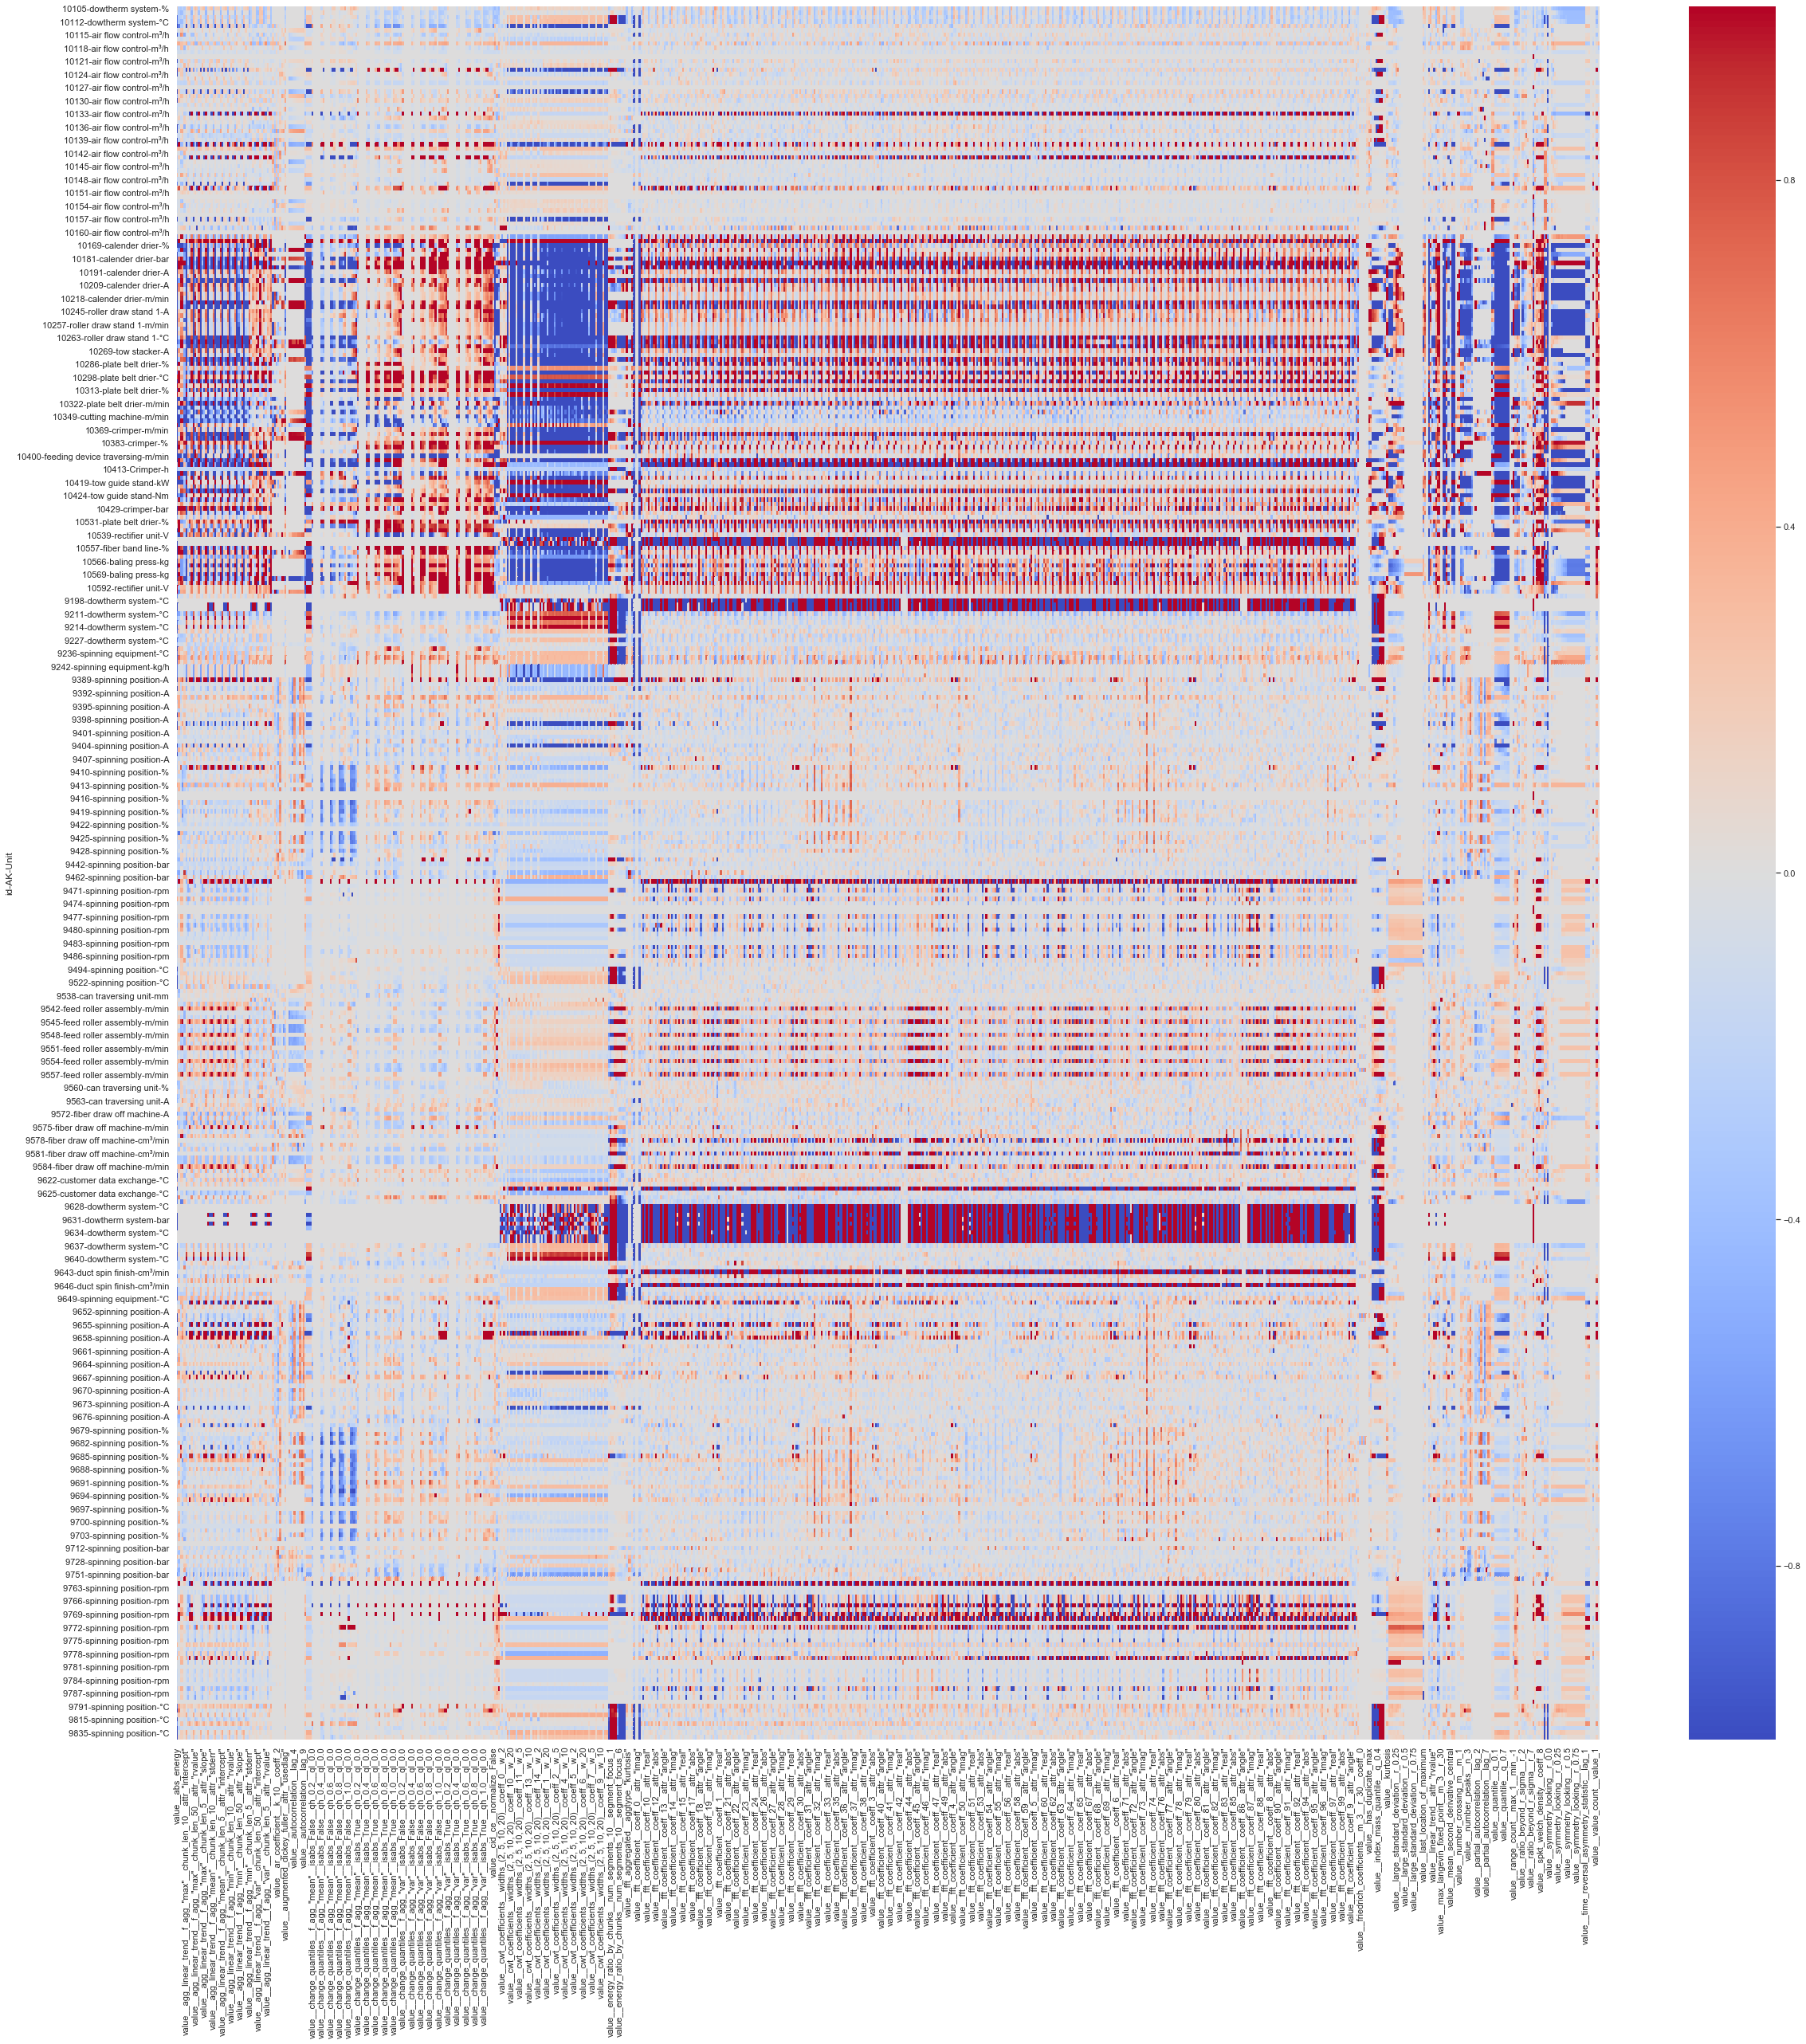

In [236]:
plt.figure(figsize=(40, 40))
sns.heatmap(cohDF1, center=0, cmap="coolwarm", vmax=1, vmin=-1)

In [237]:
# Top 10 Features for F1

In [197]:
cohDF1.

value__abs_energy  \
id    AK               Unit                      
10105 dowtherm system  %              0.110739   
10106 dowtherm system  %             -0.039189   
10111 dowtherm system  °C            -0.832152   
10112 dowtherm system  °C            -0.823239   
10113 air flow control m³/h         -17.037509   

                             value__absolute_sum_of_changes  \
id    AK               Unit                                   
10105 dowtherm system  %                          -0.275641   
10106 dowtherm system  %                          -0.316834   
10111 dowtherm system  °C                         -0.271581   
10112 dowtherm system  °C                         -0.300766   
10113 air flow control m³/h                       -0.750069   

                             value__agg_autocorrelation__f_agg_"mean"__maxlag_40  \
id    AK               Unit                                                        
10105 dowtherm system  %                                             -0.312566     
10106 dowtherm system  %                                             -0.404762     
10111 dowtherm system  °C                                            -0.255752     
10112 dowtherm system  °C                                            -0.421678     
10113 air flow control m³/h                                          -0.269937     

                             value__agg_autocorrelation__f_agg_"median"__maxlag_40  \
id    AK               Unit                                                          
10105 dowtherm system  %                                             -0.231325       
10106 dowtherm system  %                                             -0.383240       
10111 dowtherm system  °C                                            -0.163795       
10112 dowtherm system  °C                                            -0.401648       
10113 air flow control m³/h                                          -0.283295       

                             value__agg_autocorrelation__f_agg_"var"__maxlag_40  \
id    AK               Unit                                                       
10105 dowtherm system  %                                             -0.308789    
10106 dowtherm system  %                                             -0.168049    
10111 dowtherm system  °C                                            -0.304113    
10112 dowtherm system  °C                                            -0.152118    
10113 air flow control m³/h                                          -0.017997    

                             value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"  \
id    AK               Unit                                                                         
10105 dowtherm system  %                                              0.130925                      
10106 dowtherm system  %                                              0.017923                      
10111 dowtherm system  °C                                             0.279725                      
10112 dowtherm system  °C                                             0.279738                      
10113 air flow control m³/h                                          -8.346174                      

                             value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"  \
id    AK               Unit                                                                      
10105 dowtherm system  %                                              0.284182                   
10106 dowtherm system  %                                              0.023448                   
10111 dowtherm system  °C                                            -0.094723                   
10112 dowtherm system  °C                                             0.032052                   
10113 air flow control m³/h                                           0.088630                   

                             value__agg_linear_trend__f_agg_"max"__

In [238]:
cohDF1_long = cohDF1.reset_index().melt(id_vars=["AK","Unit","id"],value_name='CohensD')

In [239]:
cohDF1_long.sort_values("CohensD",ascending=False)[5000:5001]

AK Unit     id  \
65626  calender drier    %  10178   

                                                variable    CohensD  
65626  value__change_quantiles__f_agg_"var"__isabs_Tr...  14.164405

In [240]:
cohDF1.shape

(395, 788)

In [241]:
cohDF1_long.sort_values("CohensD",ascending=False).iloc[5000]

AK                                             calender drier
Unit                                                        %
id                                                      10178
variable    value__change_quantiles__f_agg_"var"__isabs_Tr...
CohensD                                               14.1644
Name: 65626, dtype: object

In [242]:
9629

9629

In [243]:
ok3d = np.load("../../data/tsfresh_3d/3d_"+"OK"+".npy")

In [244]:
f13d = np.load("../../data/tsfresh_3d/3d_"+"F1"+".npy")

In [245]:
cohDF1.shape

(395, 788)

In [246]:
cohDF1.head()

value__abs_energy  \
id    AK               Unit                      
10105 dowtherm system  %              0.110739   
10106 dowtherm system  %             -0.039189   
10111 dowtherm system  °C            -0.832152   
10112 dowtherm system  °C            -0.823239   
10113 air flow control m³/h         -17.037509   

                             value__absolute_sum_of_changes  \
id    AK               Unit                                   
10105 dowtherm system  %                          -0.275641   
10106 dowtherm system  %                          -0.316834   
10111 dowtherm system  °C                         -0.271581   
10112 dowtherm system  °C                         -0.300766   
10113 air flow control m³/h                       -0.750069   

                             value__agg_autocorrelation__f_agg_"mean"__maxlag_40  \
id    AK               Unit                                                        
10105 dowtherm system  %                                             -0.312566     
10106 dowtherm system  %                                             -0.404762     
10111 dowtherm system  °C                                            -0.255752     
10112 dowtherm system  °C                                            -0.421678     
10113 air flow control m³/h                                          -0.269937     

                             value__agg_autocorrelation__f_agg_"median"__maxlag_40  \
id    AK               Unit                                                          
10105 dowtherm system  %                                             -0.231325       
10106 dowtherm system  %                                             -0.383240       
10111 dowtherm system  °C                                            -0.163795       
10112 dowtherm system  °C                                            -0.401648       
10113 air flow control m³/h                                          -0.283295       

                             value__agg_autocorrelation__f_agg_"var"__maxlag_40  \
id    AK               Unit                                                       
10105 dowtherm system  %                                             -0.308789    
10106 dowtherm system  %                                             -0.168049    
10111 dowtherm system  °C                                            -0.304113    
10112 dowtherm system  °C                                            -0.152118    
10113 air flow control m³/h                                          -0.017997    

                             value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"  \
id    AK               Unit                                                                         
10105 dowtherm system  %                                              0.130925                      
10106 dowtherm system  %                                              0.017923                      
10111 dowtherm system  °C                                             0.279725                      
10112 dowtherm system  °C                                             0.279738                      
10113 air flow control m³/h                                          -8.346174                      

                             value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"  \
id    AK               Unit                                                                      
10105 dowtherm system  %                                              0.284182                   
10106 dowtherm system  %                                              0.023448                   
10111 dowtherm system  °C                                            -0.094723                   
10112 dowtherm system  °C                                             0.032052                   
10113 air flow control m³/h                                           0.088630                   

                             value__agg_linear_trend__f_agg_"max"__

In [212]:
list(cohDF1.columns).index('value__fft_coefficient__coeff_10__attr_"angle"')
     

258

In [ ]:
 dowtherm system
Unit                                                    °C
id                                                    9629

In [215]:
list(cohDF1.index).index((9629,'dowtherm system','°C'))

274

In [218]:
ok3d.shape[]

(336, 395, 788)

(array([  0.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 322.]),
 array([129.76744186, 129.76744186, 129.76744186, 129.76744186,
        129.76744186, 129.76744186, 129.76744186, 129.76744186,
        129.76744186, 129.76744186, 129.76744186]),
 <a list of 10 Patch objects>)

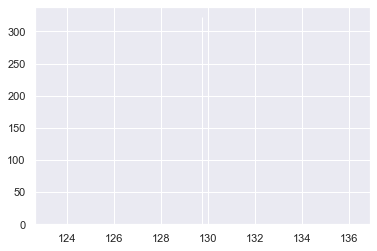

In [220]:
plt.hist(ok3d[:,258,274])

In [247]:
ok3d[:,258,274]

array([129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76

In [248]:
f13d[:,258,274]

array([129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 133.11627907,
       -59.59459459, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76744186,
       129.76744186, 129.76744186, 129.76744186, 129.76

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 115.,   0.,   0.,   1.]),
 array([-59.59459459, -48.0957809 , -36.5969672 , -25.0981535 ,
        -13.5993398 ,  -2.1005261 ,   9.3982876 ,  20.8971013 ,
         32.395915  ,  43.8947287 ,  55.3935424 ,  66.8923561 ,
         78.3911698 ,  89.88998349, 101.38879719, 112.88761089,
        124.38642459, 135.88523829, 147.38405199, 158.88286569,
        170.38167939]),
 <a list of 20 Patch objects>)

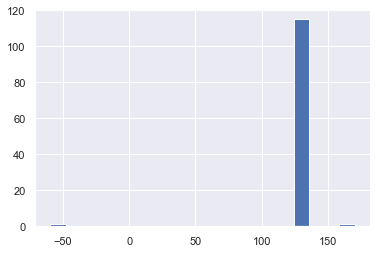

In [250]:
plt.hist(f13d[:,258,274], bins=20)